In [1]:
from sympy import *
# From: https://stackoverflow.com/a/33745882
from IPython.display import display, Math

init_printing(latex_printer=lambda *args, **kwargs: latex(*args, mul_symbol='dot', **kwargs))

In [2]:
Population, Prevalence = symbols('Population Prevalence')
TP, FP, TN, FN = symbols('TP FP TN FN')
specificity, sensitivity = symbols('specificity sensitivity')
sens = Function('sens')(specificity)
ROC_slope = symbols('ROC_slope')
TPV, FPV, TNV, FNV = symbols('TPV FPV TNV FNV')
Utility = symbols('Utility')

In [3]:
relations = [
    Population - (TP + FN + TN + FP),
    Prevalence - (TP + FN) / (TP + FN + TN + FP),
    sensitivity - (TP / (TP + FN)),
    specificity - (TN / (TN + FP)),
    Utility - (TP * TPV + FP * FPV + TN * TNV + FN * FNV)
]
relations

In [4]:
util = solve(relations, [TP, FP, TN, FN, Utility])[Utility]
util

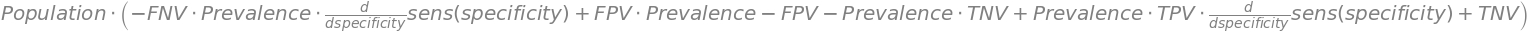

In [5]:
dutil_dspec = diff(util.subs(sensitivity, sens), specificity)
dutil_dspec

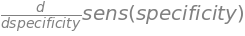

In [6]:
dSens_dSpec = diff(sens, specificity)
dSens_dSpec

In [7]:
relation = dutil_dspec.subs(dSens_dSpec, ROC_slope)
relation

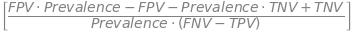

In [8]:
soln = solve(relation, ROC_slope)
soln

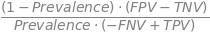

In [9]:
neatened = (FPV - TNV) * (1 - Prevalence) / (Prevalence * (TPV - FNV))
neatened

In [10]:
simplify(soln[0] - neatened)